In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train.shape

(60000, 28, 28)

In [ ]:
model = Sequential()
model.add(BatchNormalization())

model.add(SimpleRNN(256, activation = 'relu', input_shape = (28, 28, 1)))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)
# val_loss, val_acc = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/15
1875/1875 [==============================] - 76s 39ms/step - loss: 0.3665 - accuracy: 0.8866 - val_loss: 0.1581 - val_accuracy: 0.9536
Epoch 2/15
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1729 - accuracy: 0.9513 - val_loss: 0.1778 - val_accuracy: 0.9507
Epoch 3/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1413 - accuracy: 0.9595 - val_loss: 0.1285 - val_accuracy: 0.9661
Epoch 4/15
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1352 - accuracy: 0.9622 - val_loss: 0.1092 - val_accuracy: 0.9695
Epoch 5/15
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1219 - accuracy: 0.9655 - val_loss: 0.1358 - val_accuracy: 0.9612
Epoch 6/15
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1119 - accuracy: 0.9694 - val_loss: 0.1143 - val_accuracy: 0.9690
Epoch 7/15
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1071 - accuracy: 0.9702 - val_loss: 0.1213 -

In [ ]:
# model.save('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Pattern Project/model.h5')

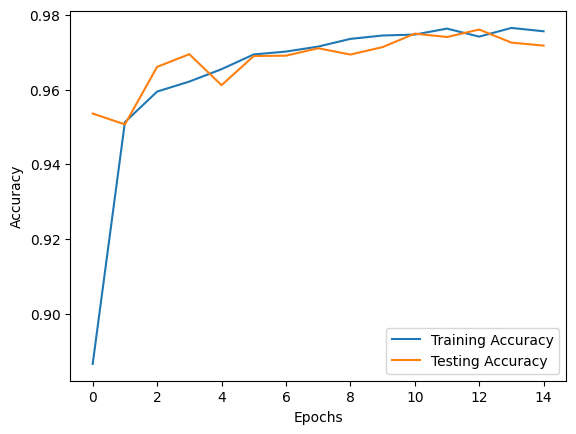

In [ ]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

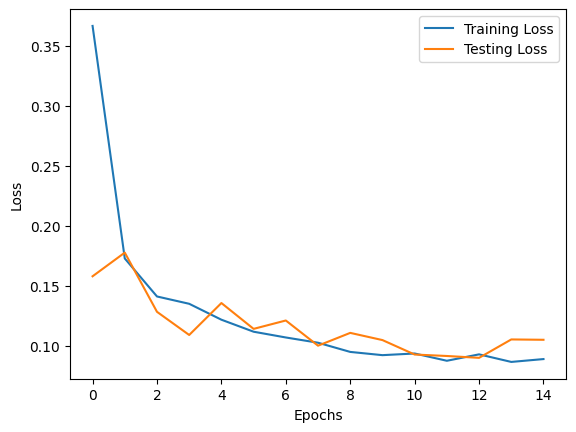

In [ ]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(y_test[:20], '\n')
print(np.round(y_pred[:20]), '\n')

predict = []
for i in range(len(y_pred)): 
  predict.append(np.argmax(y_pred[i]))

print(predict[:20], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4] 

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4] 

[[ 973    0    2    0    0    0    2    1    2    0]
 [   0 1107    4    1    1    0    2    5   15    0]
 [   3    1 1011    0    0    0    5    7    5    0]
 [   2    0   12  975    0   12    0    5    1    3]
 [   3    0    2  

<Figure size 500x500 with 0 Axes>

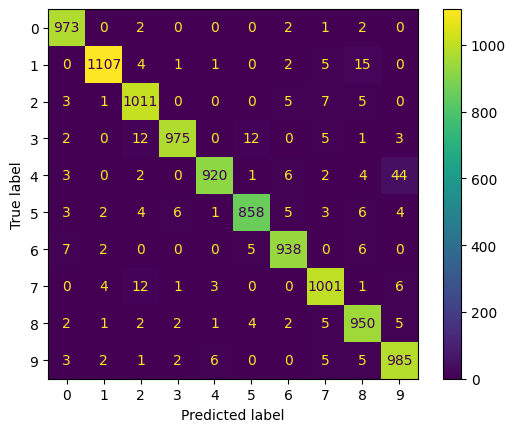

In [ ]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()